# **1. Perkenalan Dataset**


## A. Deskripsi Dataset
Dataset ini berisi data terkait kematian akibat kanker paru-paru dan merupakan kumpulan informasi pasien yang sangat komprehensif, khususnya untuk individu yang telah didiagnosis dengan kanker. Dataset ini mencakup informasi lengkap dari sekitar 800.000 individu, termasuk diagnosis, perawatan, dan hasil pengobatan kanker paru-paru.

Dataset ini memiliki 16 kolom yang terstruktur dengan baik, menjadikannya sangat berguna bagi peneliti, data scientist, maupun tenaga profesional di bidang kesehatan untuk:

* Menganalisis pola kesehatan populasi

*  Membangun model prediksi diagnosis dini

* Meningkatkan strategi deteksi dan perawatan kanker secara menyeluruh

## B. Sumber Dataset
Dataset ini diperoleh dari situs Kaggle dan telah diunduh dalam format .zip, kemudian diekstrak untuk digunakan dalam proses eksperimen ini.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [84]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [85]:
# Download file ZIP dari GitHub
!wget https://github.com/XnomaX/Eksperimen_SML_NurArief/raw/main/lungdataset_raw/dataset_lungs.zip

# Mengekstrak dataset dari zip
with zipfile.ZipFile('dataset_lungs.zip', 'r') as zip_ref:
    zip_ref.extractall()

--2025-06-13 22:30:23--  https://github.com/XnomaX/Eksperimen_SML_NurArief/raw/main/lungdataset_raw/dataset_lungs.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/XnomaX/Eksperimen_SML_NurArief/main/lungdataset_raw/dataset_lungs.zip [following]
--2025-06-13 22:30:23--  https://raw.githubusercontent.com/XnomaX/Eksperimen_SML_NurArief/main/lungdataset_raw/dataset_lungs.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19146677 (18M) [application/zip]
Saving to: ‘dataset_lungs.zip.4’

dataset_lungs.zip.4 100%[===================>]  18.26M  81.2MB/s    in 0.2s    

2025-06-13 22:30:23 (81.2 MB/

In [86]:
#Memuat dataset
df = pd.read_csv('dataset_med.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [87]:
df.dtypes

,0
id,int64
age,float64
gender,object
country,object
diagnosis_date,object
cancer_stage,object
family_history,object
smoking_status,object
bmi,float64
cholesterol_level,int64


In [88]:
df.shape

(890000, 17)

In [89]:
df.isnull().sum()

,0
id,0
age,0
gender,0
country,0
diagnosis_date,0
cancer_stage,0
family_history,0
smoking_status,0
bmi,0
cholesterol_level,0


In [90]:
df.head(5)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [91]:
df.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014128,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


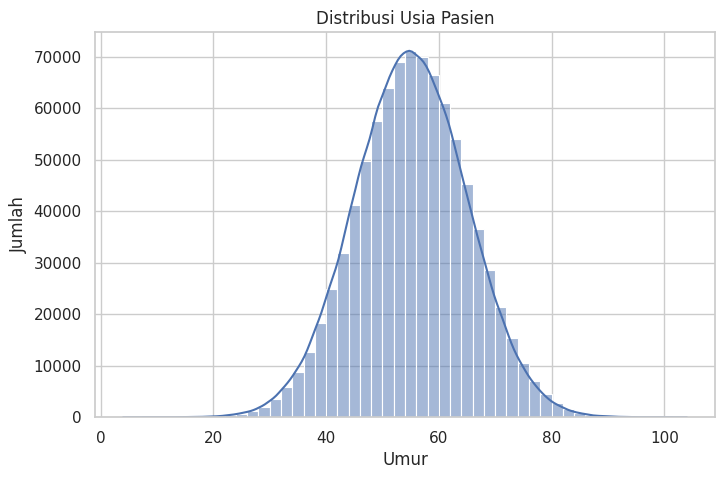

In [92]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Distribusi Usia
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=50, kde=True)
plt.title("Distribusi Usia Pasien")
plt.xlabel("Umur")
plt.ylabel("Jumlah")
plt.show()

Mayoritas pasien berusia antara 45–65 tahun.
- Ini menandakan bahwa kelompok usia ini merupakan **kelompok risiko tinggi**, sehingga penting untuk melakukan deteksi dini pada kelompok ini.

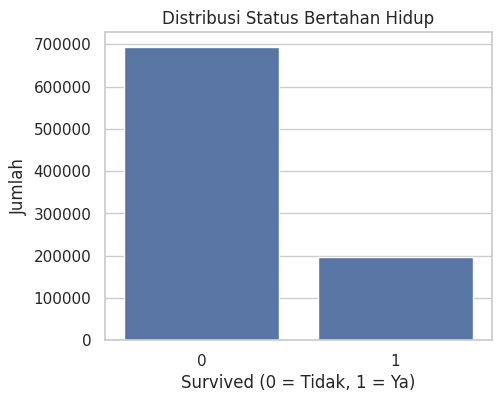

In [93]:
#Proporsi Bertahan Hidup
plt.figure(figsize=(5, 4))
sns.countplot(x='survived', data=df)
plt.title("Distribusi Status Bertahan Hidup")
plt.xlabel("Survived (0 = Tidak, 1 = Ya)")
plt.ylabel("Jumlah")
plt.show()

Kelas target `survived` sangat tidak seimbang (~78% pasien tidak selamat).
Jika tidak ditangani, model bisa menjadi bias dan selalu menebak nilai `0`.

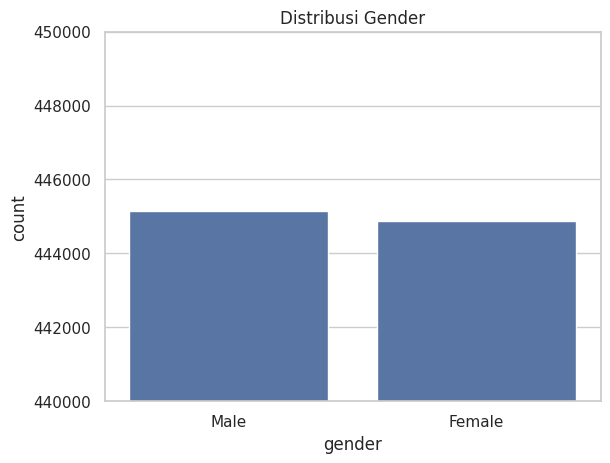

In [94]:
#Gender
sns.countplot(x='gender', data=df)
plt.title("Distribusi Gender")
plt.ylim(440000,450000)
plt.show()

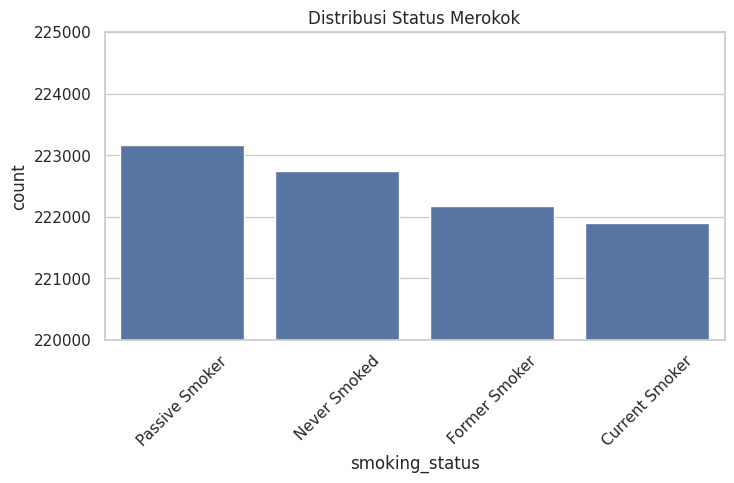

In [95]:
#Smoking Status
plt.figure(figsize=(8, 4))
sns.countplot(x='smoking_status', data=df, order=df['smoking_status'].value_counts().index)
plt.title("Distribusi Status Merokok")
plt.xticks(rotation=45)
plt.ylim(220000, 225000)
plt.show()

Meskipun yang merokok aktif relatif sedikit, paparan pasif (asap rokok) tetap berdampak besar terhadap kanker paru-paru. Ini penting untuk kebijakan kesehatan publik.

<ipython-input-96-1988263844>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='cancer_stage', data=df, order=order, palette='Set2')


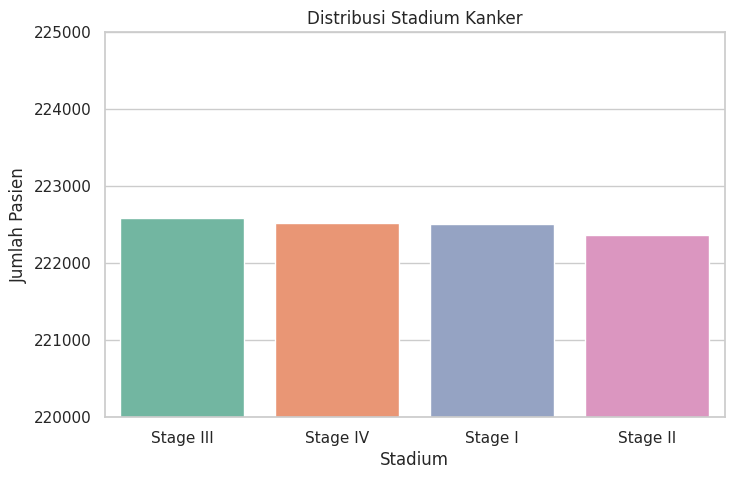

In [96]:
#Cancer Stage
plt.figure(figsize=(8, 5))
order = df['cancer_stage'].value_counts().sort_values(ascending=False).index
ax = sns.countplot(x='cancer_stage', data=df, order=order, palette='Set2')
plt.title("Distribusi Stadium Kanker")
plt.xlabel("Stadium")
plt.ylabel("Jumlah Pasien")
plt.ylim(220000, 225000)
plt.show()

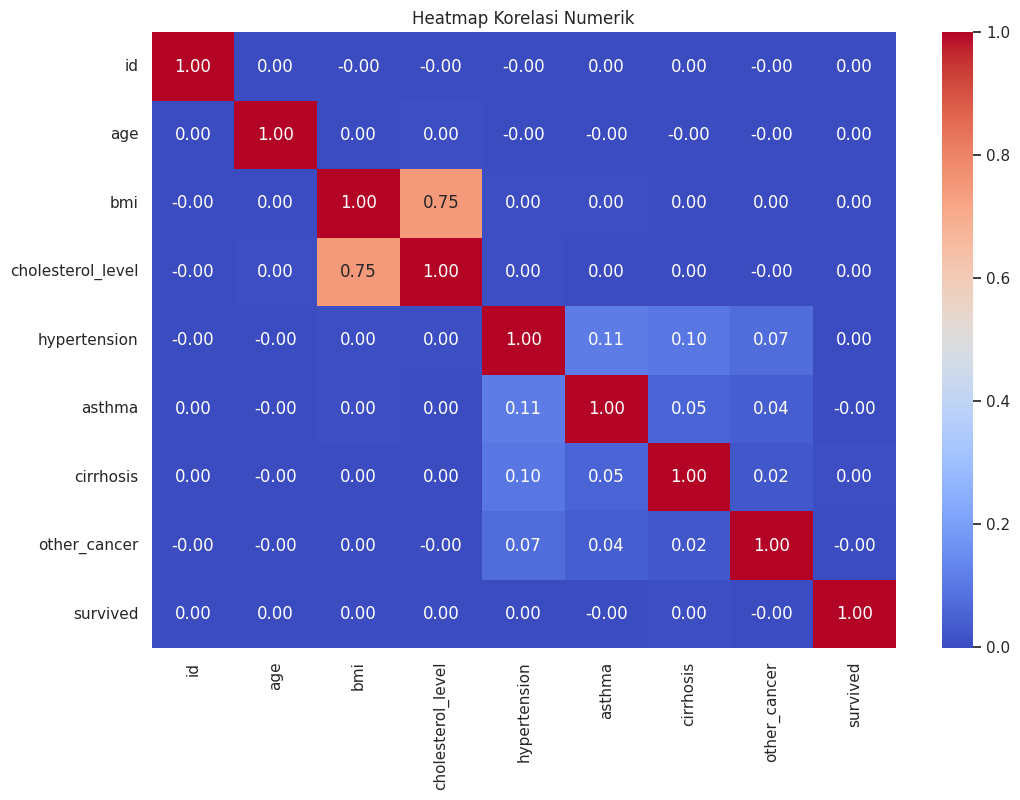

In [97]:
#Korelasi antar fitur numerik
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Numerik")
plt.show()

In [98]:
#nilai unik per kolom kategorik
categorical_cols = ['gender', 'country', 'cancer_stage', 'family_history', 'smoking_status', 'treatment_type']
for col in categorical_cols:
    print(f"\n{col} - nilai unik:")
    print(df[col].value_counts())


gender - nilai unik:
gender
Male      445134
Female    444866
Name: count, dtype: int64

country - nilai unik:
country
Malta             33367
Ireland           33243
Portugal          33208
France            33199
Sweden            33161
Croatia           33138
Greece            33052
Spain             33042
Netherlands       33040
Denmark           33024
Slovenia          33005
Belgium           32986
Hungary           32981
Romania           32963
Poland            32949
Italy             32948
Germany           32940
Estonia           32893
Czech Republic    32885
Lithuania         32856
Slovakia          32853
Austria           32832
Finland           32798
Luxembourg        32794
Cyprus            32719
Latvia            32565
Bulgaria          32559
Name: count, dtype: int64

cancer_stage - nilai unik:
cancer_stage
Stage III    222594
Stage IV     222527
Stage I      222516
Stage II     222363
Name: count, dtype: int64

family_history - nilai unik:
family_history
No     445181


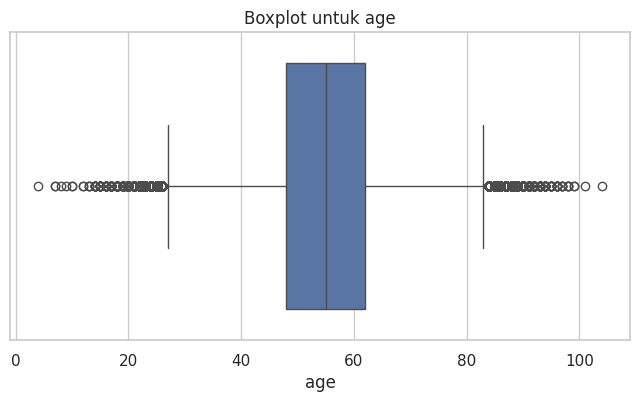

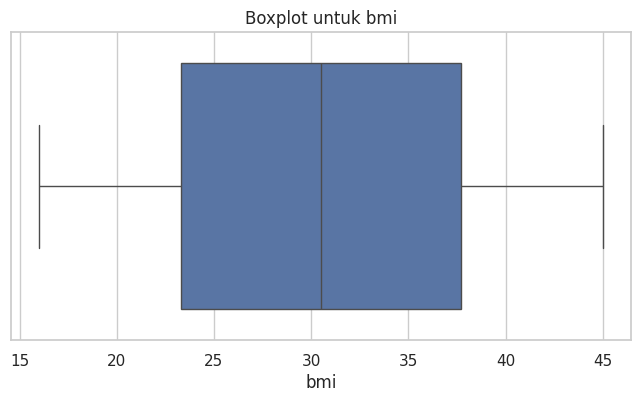

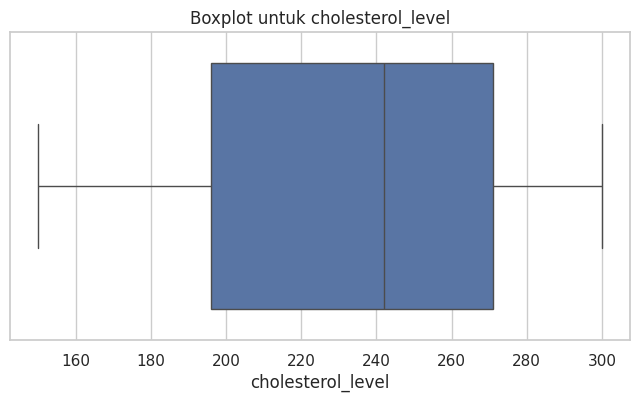

In [99]:
num_cols = ['age', 'bmi', 'cholesterol_level']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot untuk {col}')
    plt.show()

##Kesimpulan
Dataset ini sangat seimbang dan besar dan tidak ada missing value.

Distribusi umur, stadium, dan status survival cukup kaya untuk model prediksi klasifikasi.

Kelas target `survived` sangat tidak seimbang (~78% pasien tidak selamat).
> Jika tidak ditangani, model bisa menjadi bias dan selalu menebak nilai `0`.
>
> Untuk menghindari ini, akan diterapkan strategi
Oversampling atau Undersampling pada dataset

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [100]:
#Menghapus fitur yang tidak terpakai
df.drop(['id', 'diagnosis_date' , 'end_treatment_date'], axis=1, inplace=True)

In [101]:
int_cols = df.select_dtypes(include='int').columns
df[int_cols] = df[int_cols].astype(float)

In [102]:
# Hapus baris yang mengandung outlier
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

df_no_outlier = remove_outliers_iqr(df, num_cols)
print(f"Sebelum outlier dihapus: {df.shape[0]} baris")
print(f"Setelah outlier dihapus: {df_no_outlier.shape[0]} baris")


Sebelum outlier dihapus: 890000 baris
Setelah outlier dihapus: 886105 baris


In [103]:
#Mengbuat kelas target menjadi seimbang agar tidak bias
X = df_no_outlier.drop('survived', axis=1)
y = df_no_outlier['survived']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [104]:
pd.Series(y_resampled).value_counts(normalize=True)

,proportion
survived,
0.0,0.5
1.0,0.5


In [105]:
X_resampled.isnull().sum()

,0
age,0
gender,0
country,0
cancer_stage,0
family_history,0
smoking_status,0
bmi,0
cholesterol_level,0
hypertension,0
asthma,0


In [110]:
#Menencode fitur kategori
X_encoded =pd.get_dummies(
    X_resampled,
    columns=['gender','smoking_status', 'treatment_type', 'family_history', 'cancer_stage', 'country'],
    drop_first=True
)

In [111]:
#Mengscale fitur yang belum discale
scaler = StandardScaler()
numerical_cols = ['age', 'bmi', 'cholesterol_level']
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])